In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [394]:
filename=r"C:\Users\k.park99\Downloads\Fingertips Data Science Pro\Python\Machine Leaning\Final Project\Flight Fair\Python_Flight_Fare_d.xlsx"
df = pd.read_excel(filename)

In [395]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [396]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [397]:
#Unique Values
for i in df:
    print(i)
    print(df[i].value_counts())
    print('')

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019 

In [398]:
#Checking Null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [399]:
#Dropping Null Values
df=df.dropna()

In [400]:
#Extracting Jourey Month and Day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.day

In [401]:
#Dropping Date_of_Journey
df=df.drop(['Date_of_Journey'],axis=1)

In [403]:
#Extracting Departure Hour and Minutes
df['Dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_minutes']=pd.to_datetime(df.Dep_Time).dt.minute

In [404]:
#Dropping Departure Time
df=df.drop(['Dep_Time'],axis=1)

In [405]:
#Creating Duration_minutes and Duration_hours column
df['Duration_minutes']=0
df['Duration_hours']=0

In [406]:
#Analyzing Duration Column
j=0
for i in df.Duration:
    if 'h' in str(i):
        hour=i.split('h')[0]
        df['Duration_hours'][j]=hour
        j=j+1
    else:
        df['Duration_hours'][j]=0
        j=j+1
j=0
for i in df.Duration:
    if 'm' in str(i):
        if 'h' in i:
            minutes=i.split('m')[0].split()[1]
            df['Duration_minutes'][j]=minutes
            j=j+1
        else:
            minutes=i.split('m')[0].split()[0]
            df['Duration_minutes'][j]=minutes
            j=j+1
    else:
        df['Duration_minutes'][j]=0
        j=j+1

In [407]:
#Dropping Duration Column
df=df.drop(['Duration'],axis=1)

In [408]:
df.Duration_hours=df.Duration_hours.astype(int)
df.Duration_minutes=df.Duration_minutes.astype(int)

In [409]:
#Analyzing Airline column
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

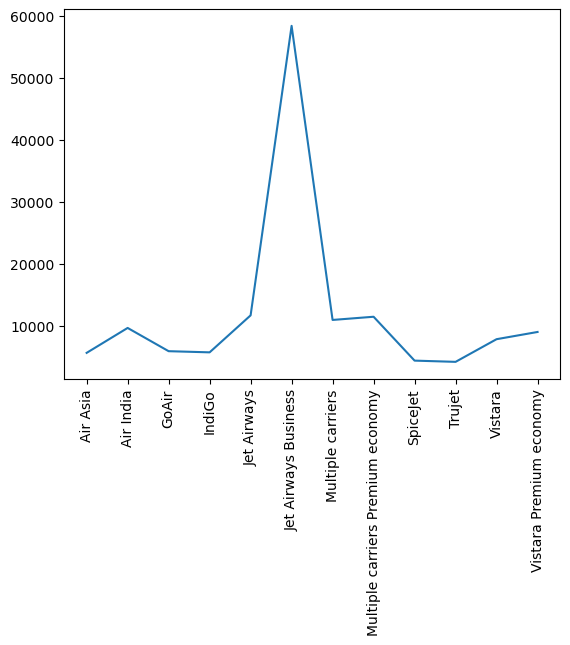

In [410]:
#Airline vs Price
plt.plot(df.groupby('Airline').mean().Price.index,df.groupby('Airline').mean().Price)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

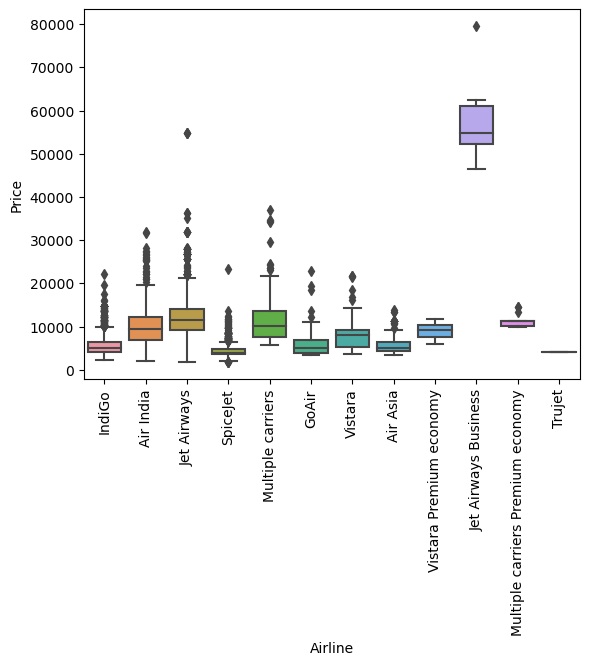

In [411]:
#Boxplots
sns.boxplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90)

In [412]:
#Encoding Airline Column 
df_airline=pd.get_dummies(df.Airline)
df=df.drop(['Airline'],axis=1)
df=pd.concat([df,df_airline],axis=1)

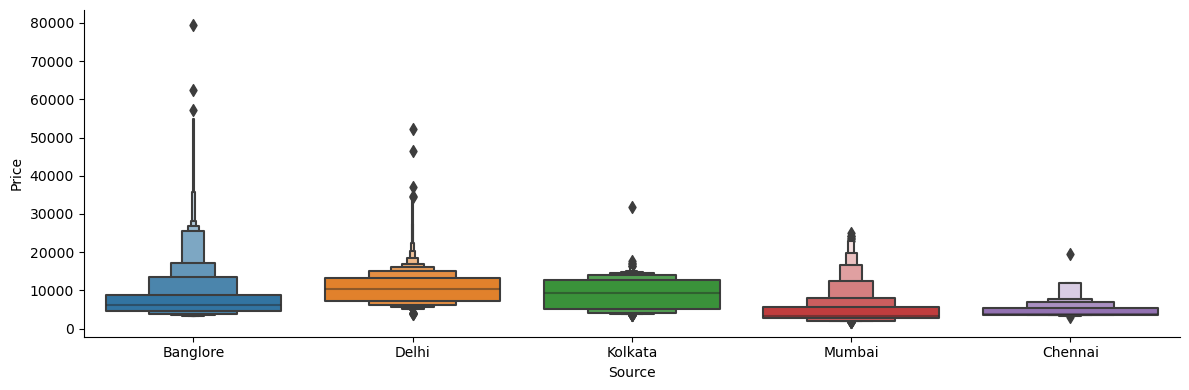

In [413]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [414]:
#Encoding Source Column
df_source=pd.get_dummies(df.Source)
df=df.drop(['Source'],axis=1)
df=pd.concat([df,df_source],axis=1)

In [415]:
#Encoding Destination Column
df_destination=pd.get_dummies(df.Destination)
df=df.drop(['Destination'],axis=1)
df=pd.concat([df,df_destination],axis=1)

In [416]:
#Dropping Route and Additional Info
df=df.drop(['Route','Additional_Info'],axis=1)

In [417]:
#Encoding Total_stops
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [418]:
#Dropping Arrival Time
df=df.drop(['Arrival_Time'],axis=1)

<AxesSubplot:>

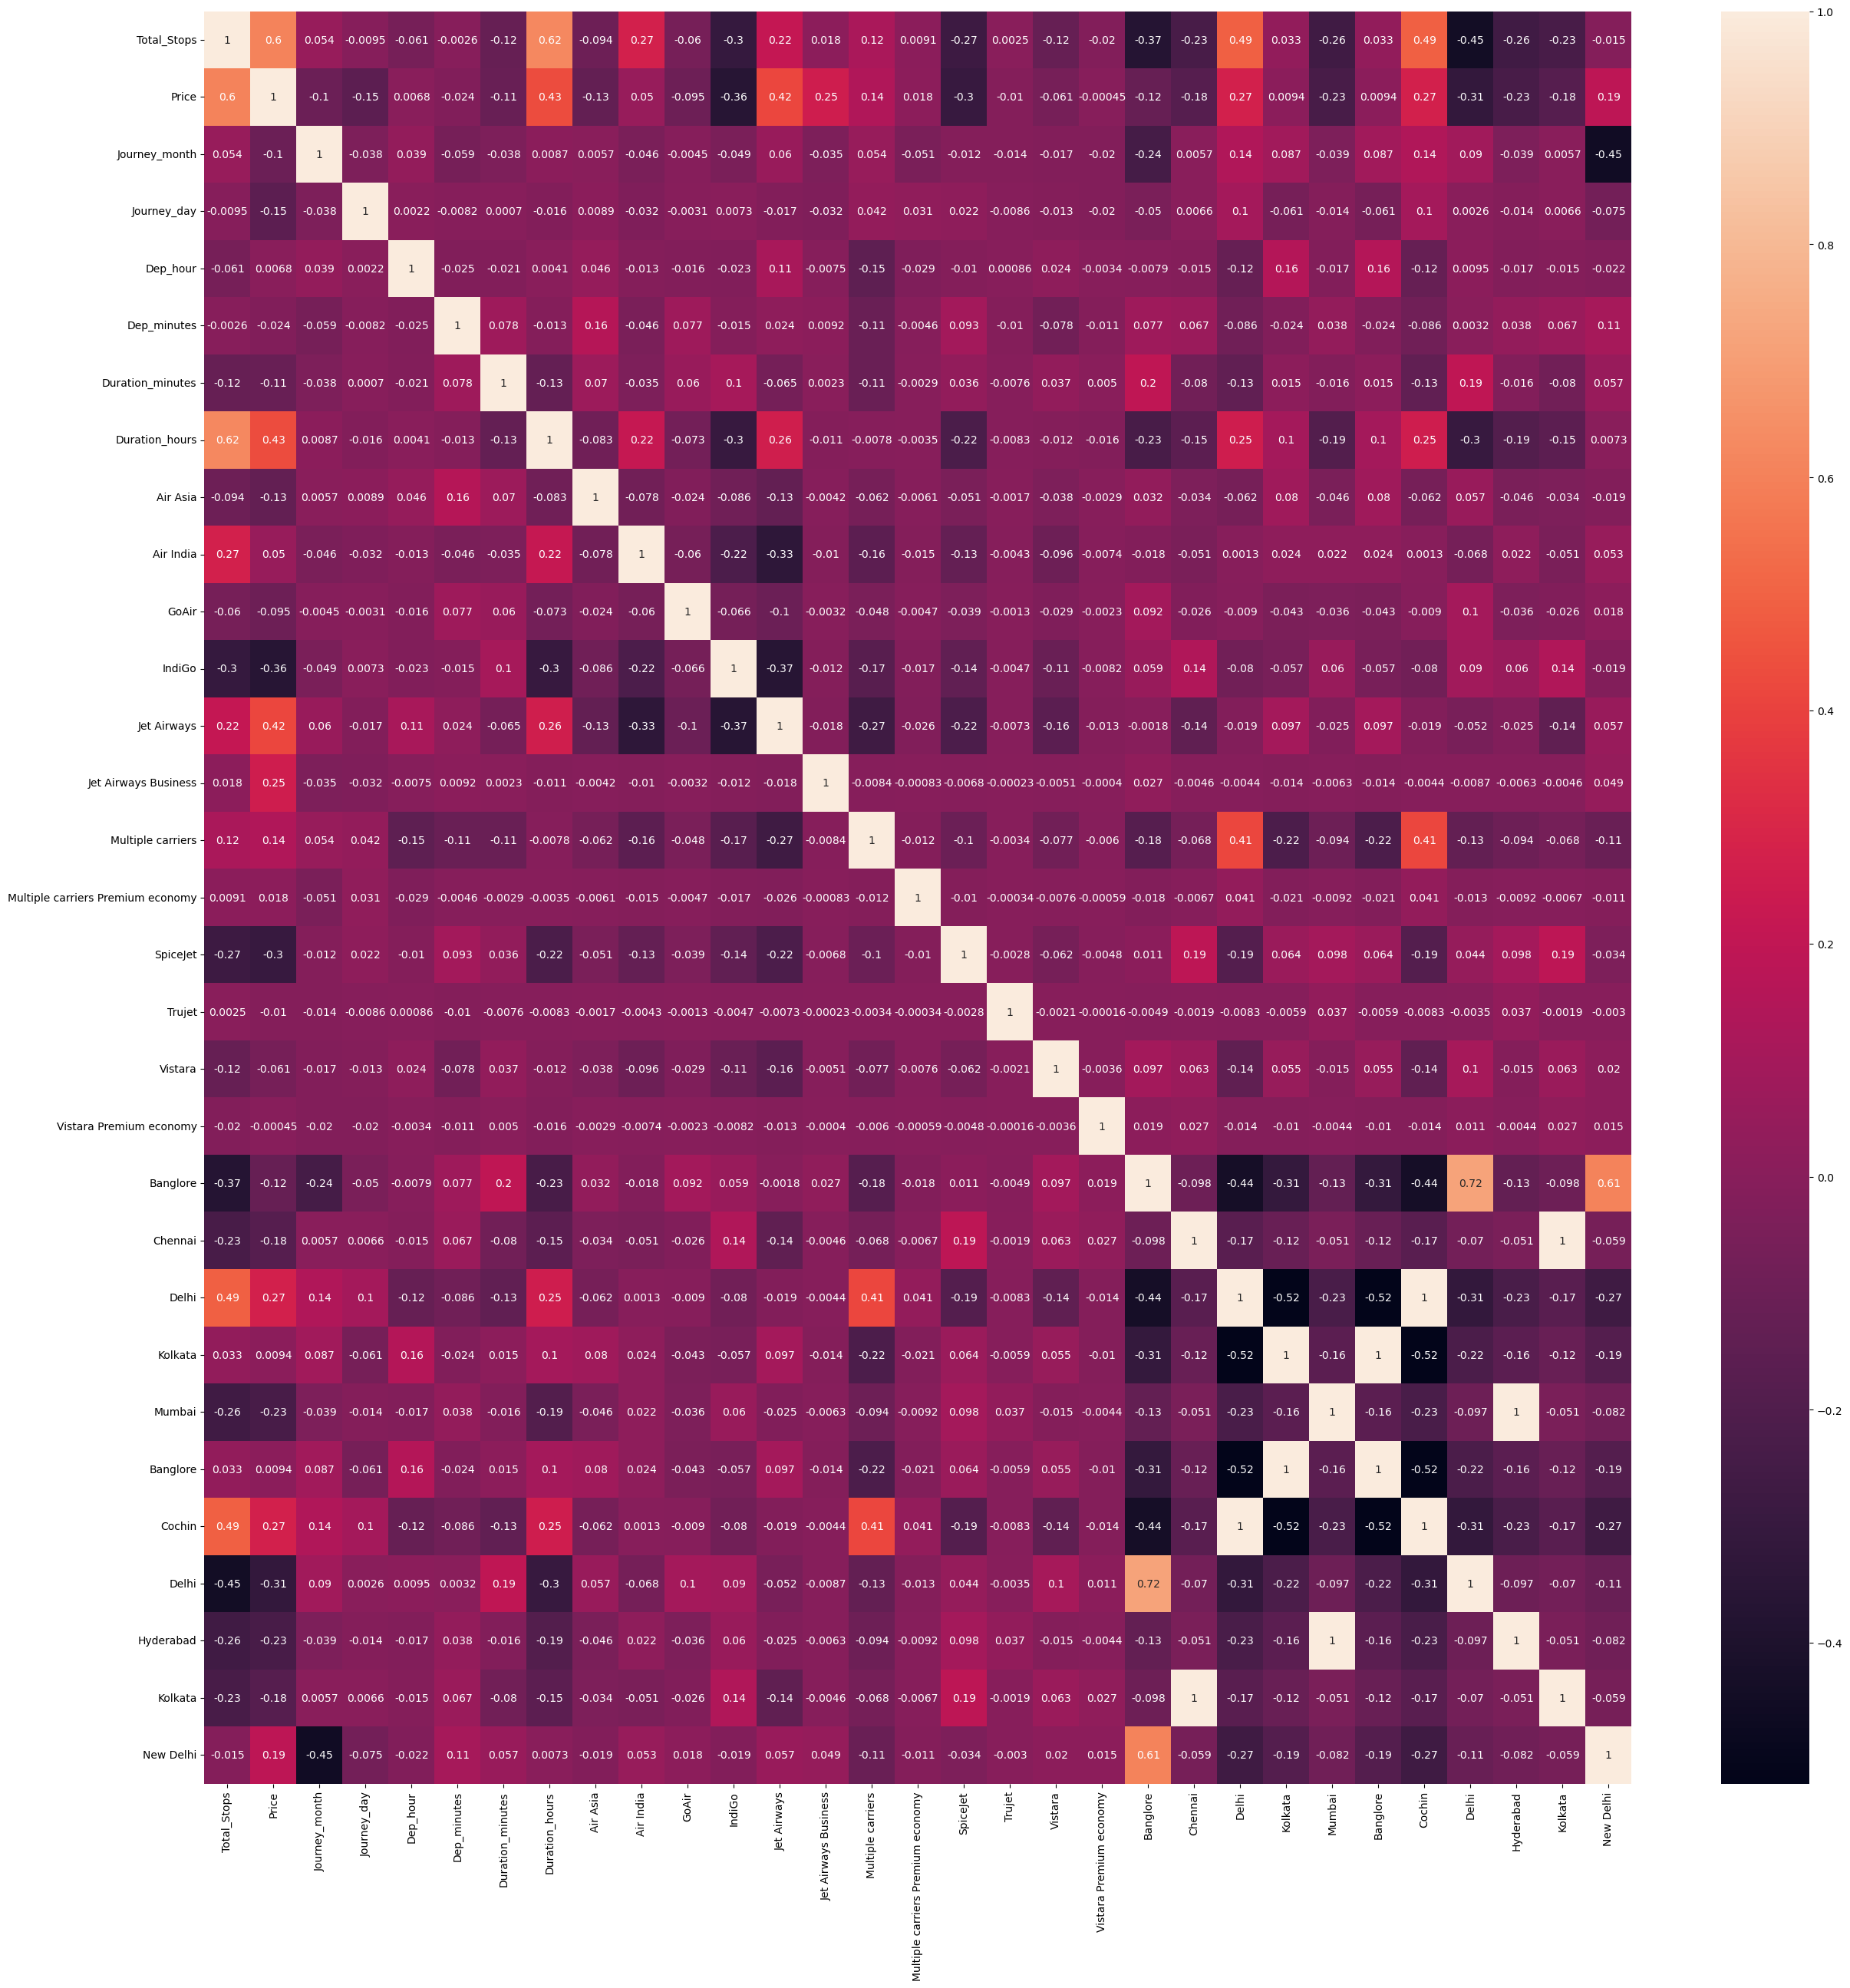

In [419]:
#Heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [420]:
df.corr()

,Total_Stops,Price,Journey_month,Journey_day,Dep_hour,Dep_minutes,Duration_minutes,Duration_hours,Air Asia,Air India,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Total_Stops,1.000000,0.603897,0.054383,-0.009451,-0.061476,-0.002618,-0.120910,0.624090,-0.094423,0.271094,...,-0.234758,0.490170,0.032761,-0.260752,0.032761,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.103643,-0.153774,0.006799,-0.024458,-0.112122,0.430717,-0.133050,0.050432,...,-0.179223,0.270676,0.009358,-0.230755,0.009358,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_month,0.054383,-0.103643,1.000000,-0.038359,0.039127,-0.059267,-0.037983,0.008725,0.005652,-0.045981,...,0.005650,0.139222,0.087177,-0.039352,0.087177,0.139222,0.090490,-0.039352,0.005650,-0.453685
Journey_day,-0.009451,-0.153774,-0.038359,1.000000,0.002170,-0.008170,0.000699,-0.016413,0.008926,-0.032490,...,0.006611,0.100088,-0.060558,-0.014030,-0.060558,0.100088,0.002632,-0.014030,0.006611,-0.075254
Dep_hour,-0.061476,0.006799,0.039127,0.002170,1.000000,-0.024745,-0.021485,0.004135,0.045960,-0.012879,...,-0.014846,-0.118780,0.155471,-0.017292,0.155471,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_minutes,-0.002618,-0.024458,-0.059267,-0.008170,-0.024745,1.000000,0.077799,-0.012929,0.158211,-0.045688,...,0.067110,-0.085534,-0.024238,0.037705,-0.024238,-0.085534,0.003200,0.037705,0.067110,0.107129
Duration_minutes,-0.120910,-0.112122,-0.037983,0.000699,-0.021485,0.077799,1.000000,-0.126643,0.069798,-0.035307,...,-0.080146,-0.134750,0.014693,-0.015996,0.014693,-0.134750,0.194463,-0.015996,-0.080146,0.056956
Duration_hours,0.624090,0.430717,0.008725,-0.016413,0.004135,-0.012929,-0.126643,1.000000,-0.082842,0.220575,...,-0.152583,0.252569,0.100897,-0.192488,0.100897,0.252569,-0.296464,-0.192488,-0.152583,0.007280
Air Asia,-0.094423,-0.133050,0.005652,0.008926,0.045960,0.158211,0.069798,-0.082842,1.000000,-0.077687,...,-0.033742,-0.061711,0.079726,-0.046355,0.079726,-0.061711,0.056552,-0.046355,-0.033742,-0.019163
Air India,0.271094,0.050432,-0.045981,-0.032490,-0.012879,-0.045688,-0.035307,0.220575,-0.077687,1.000000,...,-0.051068,0.001257,0.023606,0.022268,0.023606,0.001257,-0.068370,0.022268,-0.051068,0.053072


In [421]:
df_y=df.Price
df=df.drop(['Price'],axis=1)
df_x=df

In [422]:
#Creating Testing and Training Data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_x,df_y)

In [423]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [425]:
#Model Selection
mod = [LinearRegression,DecisionTreeRegressor,SVR,RandomForestRegressor,KNeighborsRegressor,AdaBoostRegressor]
for i in mod:
    model=i()
    model.fit(X_train,Y_train)
    score=model.score(X_train,Y_train)
    print("Algorithm is "+str(i)+" and its score is " +str(score))

Algorithm is <class 'sklearn.linear_model._base.LinearRegression'> and its score is 0.6244170576900374
Algorithm is <class 'sklearn.tree._classes.DecisionTreeRegressor'> and its score is 0.9803996114917645
Algorithm is <class 'sklearn.svm._classes.SVR'> and its score is 0.00010943867670232255
Algorithm is <class 'sklearn.ensemble._forest.RandomForestRegressor'> and its score is 0.9619617676206139
Algorithm is <class 'sklearn.neighbors._regression.KNeighborsRegressor'> and its score is 0.6279371517660898
Algorithm is <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> and its score is 0.4311096254419491


In [427]:
#KFold Cross Validation
from sklearn.model_selection import KFold,cross_val_score
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVM', SVR()))
models.append(('AdaBoost', AdaBoostRegressor()))


results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,X_train,Y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

Linear Regression 0.6179099793115541
KNN 0.40794821526134684
CART 0.6705725263524906
RF 0.8132188409219161
SVM -0.0038753252561708694
AdaBoost 0.3853050182388652


In [437]:
#Auto Random Forest classifier
def Random_Forest_Model(X_train,X_test,Y_train,Y_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    score1=0
    n1=0
    n2=0
    n3=0
    n4=0
    score2=0
    m1=0
    m2=0
    m3=0
    m4=0
    for i in range(10,500,100):
        for j in range(5,20):
            for k in range(2,50,10):
                for l in range(2,20,10):
                        model1=RandomForestRegressor(criterion='squared_error',n_estimators=i,max_depth=j, max_leaf_nodes=k,min_samples_split=l)
                        model1.fit(X_train,Y_train)
                        Y_pred=model1.predict(X_test)
                        r2=r2_score(Y_test,Y_pred)
                        if r2>score1:
                            score1=r2
                            n1=i
                            n2=j
                            n3=k
                            n4=l
    print("R2 Score of Random Forest is "+str(score1)+" where criterion is 'squared_error', n_estimators are " +str(n1)+" max_depth is "+str(n2)+" ,max_leaf_nodes are "+str(n3)+" and min_samples_split is "+str(n4))
    for i in range(10,500,100):
        for j in range(5,20):
            for k in range(2,50,10):
                for l in range(2,20,10):
                        model2=RandomForestRegressor(criterion='poisson',n_estimators=i,max_depth=j, max_leaf_nodes=k,min_samples_split=l)
                        model2.fit(X_train,Y_train)
                        Y_pred=model2.predict(X_test)
                        r2=r2_score(Y_test,Y_pred)
                        if r2>score2:
                            score2=r2
                            m1=i
                            m2=j
                            m3=k
                            m4=l
    print("R2 Score of Random Forest is "+str(score2)+" where criterion is 'poisson', n_estimators are " +str(m1)+" max_depth is "+str(m2)+" ,max_leaf_nodes are "+str(m3)+" and min_samples_split is "+str(m4))

In [438]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_Model(X_train,X_test,Y_train,Y_test)

R2 Score of Random Forest is 0.7601890985139343 where criterion is 'squared_error', n_estimators are 10 max_depth is 18 ,max_leaf_nodes are 42 and min_samples_split is 12
R2 Score of Random Forest is 0.4582142819025393 where criterion is 'poisson', n_estimators are 10 max_depth is 18 ,max_leaf_nodes are 42 and min_samples_split is 12


In [442]:
from sklearn.metrics import r2_score
model_final=RandomForestRegressor(criterion='squared_error', n_estimators=10, max_depth=18, max_leaf_nodes=42, 
                                  min_samples_split=12)
model_final.fit(X_train,Y_train)
Y_pred=model_final.predict(X_test)
print("Training Score is "+ str(model_final.score(X_train,Y_train)))
print("Testing Score is "+ str(model_final.score(X_test,Y_test)))
print("R2 Score is "+ str(r2_score(Y_test,Y_pred)))

Training Score is 0.790767940049389
Testing Score is 0.750773084114793
R2 Score is 0.750773084114793
